In [1]:
import numpy as np
import os
import itertools
from os import path
import sys
sys.path.append('../')
import modules.channel.channelFlows as cf

fig_dir = os.path.join(os.getcwd(),'figures')
data_dir = os.getcwd() + '''/../../dat/'''
if not path.exists(data_dir):
    os.mkdir(data_dir)
    
temp = [10**e * np.linspace(1.0,9.0,9) for e in range(-6,10)] 
S = list(itertools.chain.from_iterable(temp))

def computeCoeffs(sp, sm, N=1, tol=1e-15, eps=5e-15):
    # compute coeffs
    coeffsObj = cf.StartupCoefficients_scaled()
    Kn = coeffsObj.Kn(sp, sm, N, tol, eps)
    An = coeffsObj.An(sp, sm, Kn) # depends on Kn

    return (Kn[0], An[0])
        
temp = [10**e * np.array([1.0, 4.0]) for e in range(-2,4)] 
Sms = list(itertools.chain.from_iterable(temp))
Sms.insert(0,0.0)
print("Sms: " + str(Sms))

coeffsList = {}
for sm in Sms:
    coeffsList[sm] = {'kn':[], 'an':[]}
    for sp in S:
        # create python coeffs
        coeffPair = computeCoeffs(sp, sm)
        coeffsList[sm]['kn'].append(coeffPair[0])
        coeffsList[sm]['an'].append(coeffPair[1])
    
print('Done')

Sms: [0.0, 0.01, 0.04, 0.1, 0.4, 1.0, 4.0, 10.0, 40.0, 100.0, 400.0, 1000.0, 4000.0]
Done


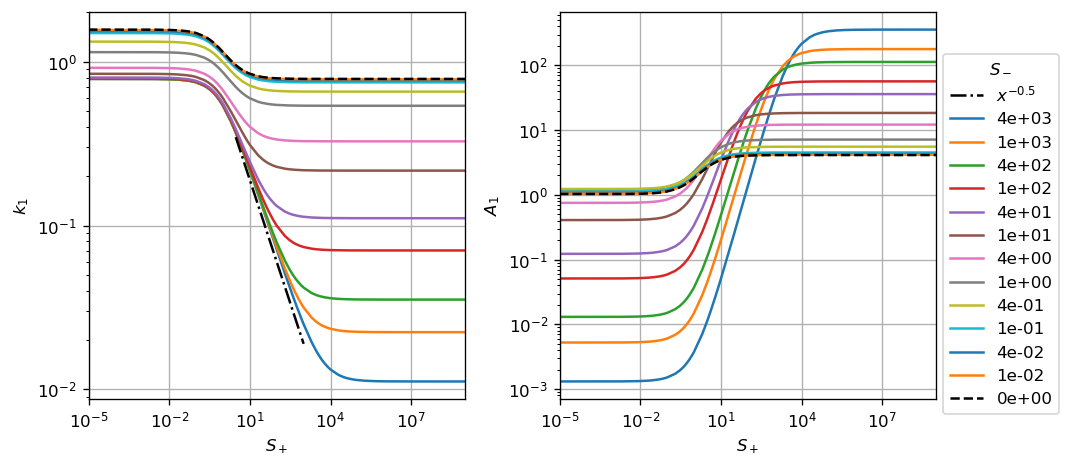

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# custom color cycler
from cycler import cycler

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
cc = (cycler(color=reversed(colors)))
cc = (cycler(color=colors))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(120)
fig.set_tight_layout(True)
fig.set_size_inches(8, 4)

ax1.grid()
ax1.set_prop_cycle(cc)
ax1.set_xlabel('$S_+$')
ax1.set_ylabel('$k_1$')
ax1.set_xlim(S[9], S[-9])

ax2.grid()
ax2.set_prop_cycle(cc)
ax2.set_xlabel('$S_+$')
ax2.set_ylabel('$A_1$')
ax2.set_xlim(S[9], S[-9])

lines = []
ax1.set_prop_cycle(cc)
ax2.set_prop_cycle(cc)
for sp,spData in reversed(coeffsList.items()):
    if np.isclose(sp,0.0):
        continue
    ax1.loglog(S, spData['kn'])
    line = ax2.loglog(S, spData['an'], label=str('{:1.0e}'.format(sp)))

exponent = -1/np.sqrt(5) -0.048
exponent = -0.5
xlaw = np.linspace(3e0, 1e3, 100)
ylaw = 0.6*np.power(xlaw, exponent)
ax1.loglog(xlaw, ylaw, label='$x^{' + str(round(exponent,2)) + str('}$'), ls='-.', color='black')
    
sp = 0.0 
spData = coeffsList[sp]
ax1.loglog(S, spData['kn'], ls='--', color='black')
line = ax2.loglog(S, spData['an'], label=str('{:1.0e}'.format(sp)), ls='--', color='black')
    
    
fig.legend(loc='center left', ncol=1, bbox_to_anchor=(0.98, 0.5), columnspacing=0.4, title='$S_-$')
fig.savefig(os.path.join(fig_dir, 'coeffs_Sp_Sm.pdf'), bbox_inches='tight')

# Figure 8

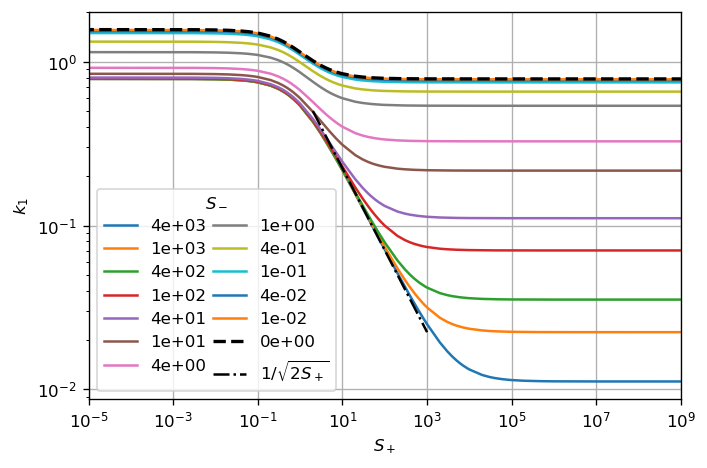

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import repeat

# custom color cycler
from cycler import cycler
cc = (cycler(color=list('rgb')) +
      cycler(linestyle=['-', '--', '-.']))
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
cc = (cycler(color=colors))

fig, ax1 = plt.subplots(1, 1)
fig.set_dpi(120)
fig.set_tight_layout(True)

ax1.grid()
ax1.set_prop_cycle(cc)
ax1.set_xlabel('$S_+$')
ax1.set_ylabel('$k_1$')
ax1.set_xlim(S[9], S[-9])

ax1.set_prop_cycle(cc)
for sp,spData in reversed(coeffsList.items()):
    if np.isclose(sp,0.0):
        continue
    ax1.loglog(S, spData['kn'], label=str('{:1.0e}'.format(sp)))
sp = 0.0 
spData = coeffsList[sp]
ax1.loglog(S, spData['kn'], ls='--', lw=2, color='black', label=str('{:1.0e}'.format(sp)))

exponent = -0.5
xlaw = np.linspace(2e0, 1e3, 100)
ylaw = (1/np.sqrt(2))*np.power(xlaw, exponent)
ax1.loglog(xlaw, ylaw, label='$1/\sqrt{2S_+} $', ls='-.', color='black')
    
ax1.legend(loc='lower left', ncol=2, columnspacing=0.4, title='$S_-$')
fig.savefig(fig_dir + '/' + 'k1_coeff_Sp_Sm.pdf', bbox_inches='tight')

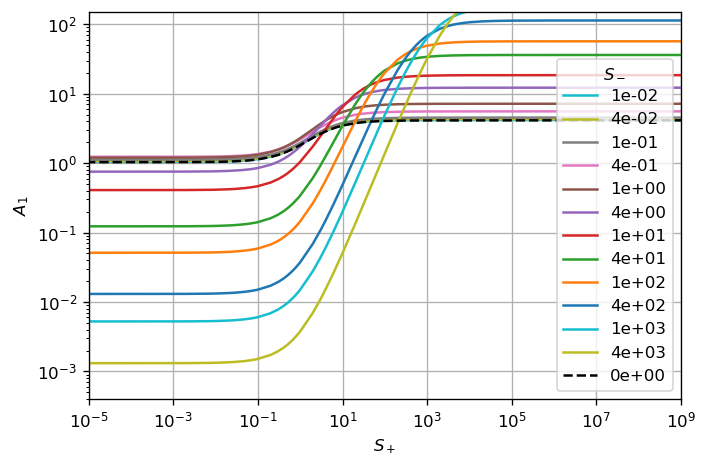

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# custom color cycler
from cycler import cycler
cc = (cycler(color=list('rgb')) +
      cycler(linestyle=['-', '--', '-.']))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
cc = (cycler(color=reversed(colors)))

fig, ax2 = plt.subplots(1, 1)
fig.set_dpi(120)
fig.set_tight_layout(True)

ax2.grid()
ax2.set_prop_cycle(cc)
ax2.set_xlabel('$S_+$')
ax2.set_ylabel('$A_1$')
ax2.set_xlim(S[9], S[-9])
ax2.set_ylim(0.0004, 150)

lines = []
ax2.set_prop_cycle(cc)
for sp,spData in coeffsList.items():
    if np.isclose(sp,0.0):
        continue
    line = ax2.loglog(S, spData['an'], label=str('{:1.0e}'.format(sp)))
    
sp = 0.0 
spData = coeffsList[sp]
ax1.loglog(S, spData['kn'], ls='--', color='black')
line = ax2.loglog(S, spData['an'], label=str('{:1.0e}'.format(sp)), ls='--', color='black')
    
ax2.legend(loc='lower right', ncol=1, columnspacing=0.4, title='$S_-$')
fig.savefig(fig_dir + '/' + 'a1_coeffs_Sp_Sm.pdf', bbox_inches='tight')